## 1 黎曼和式积分(Relman Sum)

积分即是求面积

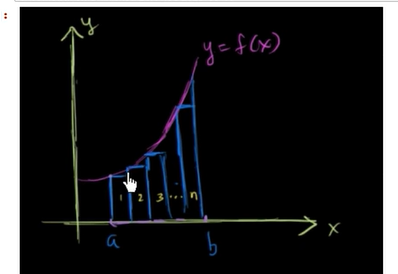

$$
\begin{split}
&\int_a^bf(x)dx=\lim_{n\to \infty}\sum_{i=1}^nf(x_i)\Delta x\\
&\Delta x=\frac{b-a}n\\
&x_i=a+\frac{b-a}n\cdot i
\end{split}
$$

$$
\begin{split}
\int_\pi^{2\pi}cos(x)dx=\lim_{n\to \infty}\sum_{i=1}^ncos(\pi+\frac{\pi}n\cdot i)\frac{2\pi-\pi}n=\lim_{n\to \infty}\sum_{i=1}^ncos(\pi+\frac{\pi}n\cdot i)\frac{\pi}n\\
\end{split}
$$

In [1]:
import numpy as np

def cos(x):
    return np.cos(x)

def reimann_sum(f,a,b,N=10000):
    total_sum=0
    for i in range(1,N+1):
        total_sum += f(a+(b-a)/N*i)
    return (b-a)/N*total_sum
%time


Wall time: 0 ns


In [10]:
%%time
reimann_sum(cos,np.pi,2*np.pi,N=100000)

Wall time: 65.2 ms


3.141592653553481e-05

$$
\begin{split}
\lim_{n\to\infty}\sum_{i=1}^nln(2+\frac{5i}n)\frac{5}n\\
\end{split}
$$
· 由和式积分得到原始积分

·$\frac{5}n =\frac{b-a}n$

·$2+\frac{5i}n = a+\frac{b-a}n \cdot i$

·$b-a=5,a=2,b=7$
$$
\int_2^7ln(x)dx
$$

In [11]:
def ln(x):
    return np.log(x)

In [13]:
%%time
reimann_sum(ln,2,7,N=100000)


Wall time: 67.9 ms


7.235108001267132

## 2.expected value

$$
E(f(x))=\int f(x)p(x)dx=\lim_{N\to\infty}\frac{1}N\sum_{i=1}^Nf(x_i)_{{x_i}～p(x)}\\
E(x)=\int xf(x)dx=\lim_{N\to\infty}\frac{1}N\sum_{i=1}^N(x_i)_{{x_i}～p(x)}\\
$$

In [14]:
from scipy import stats
import numpy as np


In [17]:
%%time
def expected (rv,N=10**6):
    return sum([rv.rvs() for _ in range(N)])/N  #通过列表推导式生成N个随机样本

rv = stats.norm() #创建一个标准正态分布对象rv
expected(rv)


Wall time: 14.3 s


0.0011779480879652172

In [19]:
%%time
mu,sigma =1,1 
s=np.random.normal(mu,sigma,10**8)
np.mean(s)

Wall time: 1.51 s


0.999676638327403

## 3.求积分

$$
\int_a^b f(x)dx
$$
- step1:[a,b]内均匀采样n个点，记为$x_1,x_2,x_3,...,x_n$
- step2:计算$Q_n= (b-a)\frac{1}n\sum_{i=1}^nf(x_i)$（和式积分）


In [20]:
%%time
def calc_int(f,a,b,N=10**8):
    delta =(b-a)/N
    s=sum(map(f,np.random.uniform(a,b,N)))
    return s*delta

Wall time: 0 ns


$$
f(x)=\frac{1}{1+sinh(2x)log(x)^2}
$$

In [21]:
%%time
f=lambda x :1/(1+np.sinh(2*x)*np.log(x)**2)
a=0.8
b=3
calc_int(f,a,b)

Wall time: 3min 54s


0.6767929571741559

In [22]:
%%time
reimann_sum(f,a,b,N=10**8)

Wall time: 3min 40s


0.6768400659239583